# Team 5 - MIS 587 EDA Assignment 

In [70]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
                
# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [71]:
application_train = pd.read_csv('C:\\Users\\ual-laptop\\Documents\\MIS 587\\Project\\Data\\application_train.csv')
bureau = pd.read_csv('C:\\Users\\ual-laptop\\Documents\\MIS 587\\Project\\Data\\bureau.csv')

In [8]:
#Loan Application Fact Table
print('Number of data points: ', application_train.shape[0])
print('Number of features: ', application_train.shape[1])
application_train.head(5)

Number of data points:  307511
Number of features:  122


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Bureau Table - All client's previous credits provided by other financial institutions that were reported to Credit Bureau
print('Number of data points: ', bureau.shape[0])
print('Number of features: ', bureau.shape[1])
bureau.head(5)


Number of data points:  1716428
Number of features:  17


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


# DESCRIPTIVE STATISTICS


<h3> 1. Target is the dataset’s predictor variable. 0 stands for non-defaulter and 1 stands for Defaulters. </h3>

In [10]:
application_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

<h3> 2. To find the correlations between similar variables (all related to the Loan expenditure), I checked this. High correlation meant we could retain only one column which gives the most value. </h3>

In [11]:
corr1=round(application_train.AMT_CREDIT.corr(application_train.AMT_GOODS_PRICE),2)
corr2=round(application_train.AMT_ANNUITY.corr(application_train.AMT_CREDIT),2)
corr3=round(application_train.AMT_ANNUITY.corr(application_train.AMT_GOODS_PRICE),2)
print('Correlation of Credit amount vs Price of goods:',corr1)
print('Correlation of Annuity amount vs Credit amount:',corr2)
print('Correlation of Annuity amount vs Price of goods:',corr3)

Correlation of Credit amount vs Price of goods: 0.99
Correlation of Annuity amount vs Credit amount: 0.77
Correlation of Annuity amount vs Price of goods: 0.78


<h3> 3. We also analyzed some categorical variables (the education type and occupation type) to check the unique values of the same. </h3>

In [12]:
application_train['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [13]:
application_train['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

<h3> 4. We wanted to also check the bracket of income, which is why it made sense to group for individual SK_ID (loan ID) and see the distribution. </h3>

In [14]:
income_data = application_train.groupby('SK_ID_CURR').agg({'AMT_INCOME_TOTAL':'mean'}).reset_index()
income_data.head(5)

,SK_ID_CURR,AMT_INCOME_TOTAL
0,100002,202500.0
1,100003,270000.0
2,100004,67500.0
3,100006,135000.0
4,100007,121500.0


# Visual Exploration


<h3> 1. Stacked Bar Plot - Number of loans approved vs rejected per Gender </h3>

In [15]:
def stack_plot(data, xtick, col2='TARGET', col3='total', xlabel=''):
    ind = np.arange(data.shape[0])
    
    if len(data[xtick].unique()) < 5:
        plt.figure(figsize=(5,5))
    elif len(data[xtick].unique()) > 5 and len(data[xtick].unique()) < 10:
        plt.figure(figsize=(7,7))
    else:
        plt.figure(figsize=(15,15))
    
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values, bottom=data[col3].values)

    plt.ylabel('Loans')
    plt.xlabel(xlabel)  # Dynamic xlabel
    plt.title('Number of loans approved vs rejected')
    plt.xticks(ticks=ind, rotation=90, labels=list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('0-Non-Defaulter', '1-Defaulter'))
    plt.show()
    
    
def univariate_barplots(data, col1, col2='TARGET', xlabel='', top=False):
    
    temp = pd.DataFrame(application_train.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    temp['total'] = pd.DataFrame(application_train.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(application_train.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'], inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total', xlabel=xlabel)
    print(temp.head(5))
    print("=" * 50)
    print(temp.tail(5))

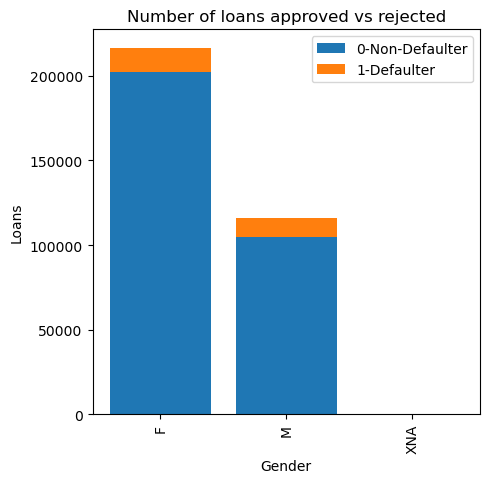

  CODE_GENDER  TARGET   total       Avg
0           F   14170  202448  0.069993
1           M   10655  105059  0.101419
2         XNA       0       4  0.000000
  CODE_GENDER  TARGET   total       Avg
0           F   14170  202448  0.069993
1           M   10655  105059  0.101419
2         XNA       0       4  0.000000


In [16]:
univariate_barplots(application_train, 'CODE_GENDER', 'TARGET', xlabel='Gender')

<h3> 2. Distribution of income for different Occupations </h3>

In [17]:
def plotstrip(df,xval,yval,hueval,yfig):
    fig,ax = plt.subplots(figsize=(15,yfig))
    sns.stripplot(x=xval,y=yval,hue=hueval,data=df,alpha=0.5,jitter=0.8,dodge=True,ax=ax).set_title(yval);
    plt.legend(labels=['0-Non Defaulters', '1-Defaulters'], bbox_to_anchor=(1.05, 1))
    ax.set_title("Distribution of Income for for different Occupations")
    plt.show()

In [20]:
#Remove outliers 
def get_thresh(df,field):
    """ Outliers are usually > 3 standard deviations away from the mean. """
    ave=np.mean(df[field])
    sdev=np.std(df[field])
    threshold=round(ave+(3*sdev),2)
    print('Threshold for',field,':',threshold)
    return threshold

In [21]:
thresh_income = get_thresh(application_train,'AMT_INCOME_TOTAL')

Threshold for AMT_INCOME_TOTAL : 880166.2


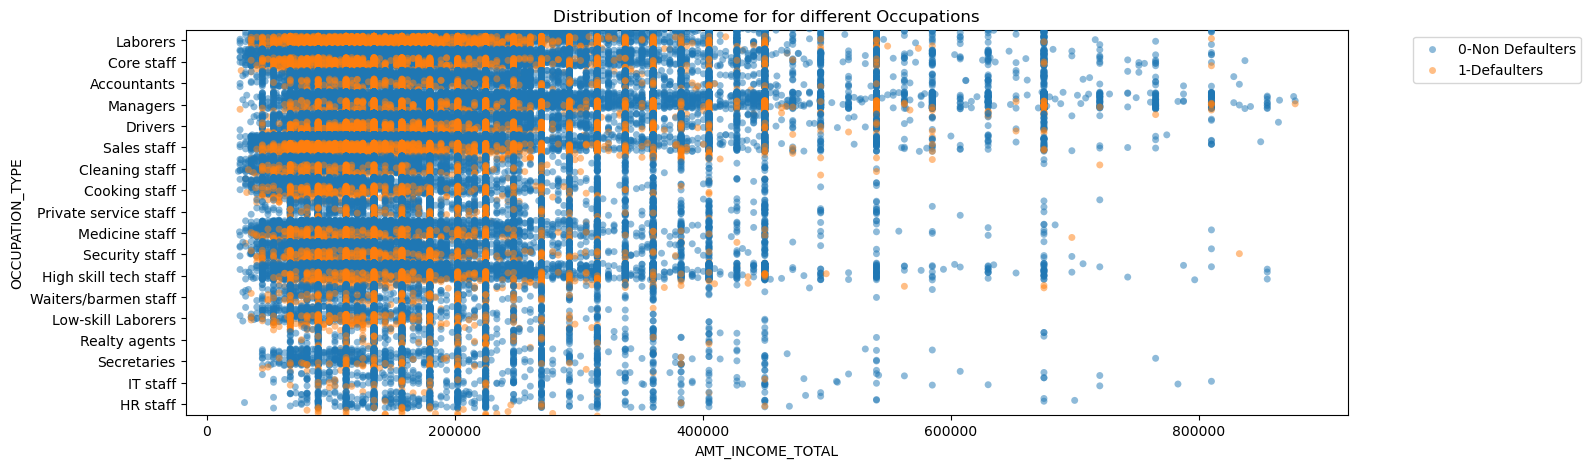

In [23]:
plotstrip(application_train[application_train.AMT_INCOME_TOTAL<thresh_income],'AMT_INCOME_TOTAL','OCCUPATION_TYPE','TARGET',5)

<h3> 3. Relationship between Target and External Resources </h3>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   TARGET        307511 non-null  int64  
 1   EXT_SOURCE_1  134133 non-null  float64
 2   EXT_SOURCE_2  306851 non-null  float64
 3   EXT_SOURCE_3  246546 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 9.4 MB
None


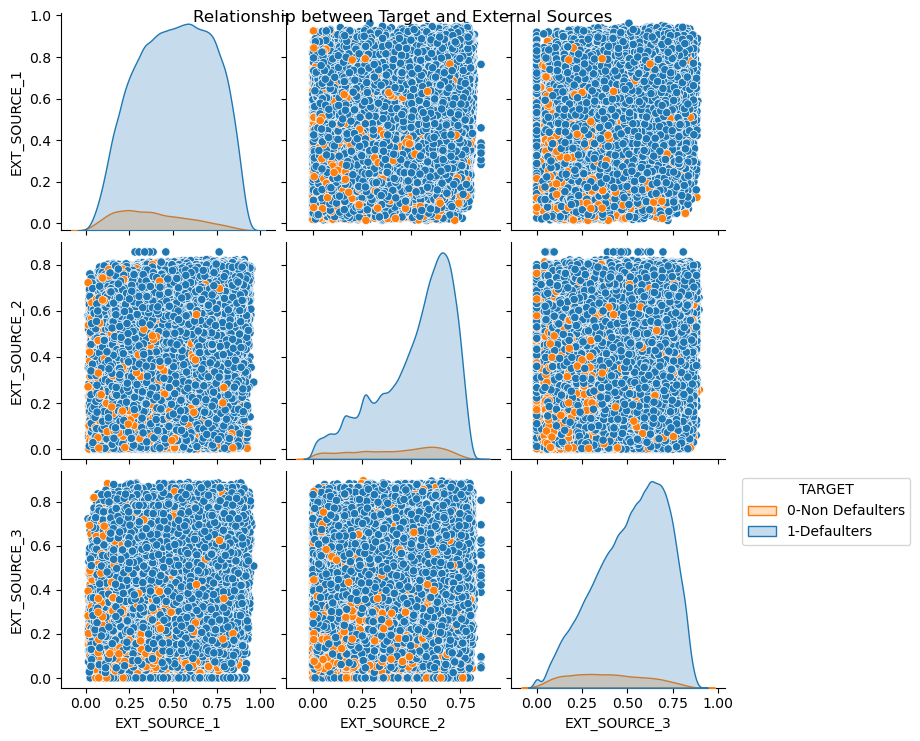

In [24]:
temp=application_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]
print(temp.info())
pairplot = sns.pairplot(temp,hue='TARGET')
pairplot._legend.remove()
plt.legend(['0-Non Defaulters', '1-Defaulters'], title='TARGET', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('Relationship between Target and External Sources')
plt.show()

<h3> 4. Box plot To Find Outliers - AMT_CREDIT_SUM </h3> 
AMT_CREDIT_SUM - Current credit amount for the Credit Bureau credit

In [45]:
#Filling the missing values before plotting
# For non-credit card types
non_credit_card_condition = bureau['CREDIT_TYPE'] != 'Credit card'
active_condition = bureau['CREDIT_ACTIVE'] == 'Active'
closed_sold_bad_debt_condition = bureau['CREDIT_ACTIVE'].isin(['Closed', 'Sold', 'Bad debt'])

bureau.loc[non_credit_card_condition & active_condition & pd.isnull(bureau['AMT_CREDIT_SUM']), 'AMT_CREDIT_SUM'] = bureau['AMT_CREDIT_SUM_DEBT']
bureau.loc[non_credit_card_condition & closed_sold_bad_debt_condition & pd.isnull(bureau['AMT_CREDIT_SUM']), 'AMT_CREDIT_SUM'] = 0

#For credit card types
credit_card_condition = bureau['CREDIT_TYPE'] == 'Credit card'
bureau.loc[credit_card_condition & pd.isnull(bureau['AMT_CREDIT_SUM']), 'AMT_CREDIT_SUM'] = bureau['AMT_CREDIT_SUM_DEBT'] + bureau['AMT_CREDIT_SUM_LIMIT']
bureau.loc[credit_card_condition & pd.isnull(bureau['AMT_CREDIT_SUM']), 'AMT_CREDIT_SUM'] = bureau['AMT_CREDIT_SUM_DEBT'] + bureau['AMT_CREDIT_SUM_LIMIT']


In [49]:
bureau_merged = application_train[['SK_ID_CURR','TARGET']].merge(bureau, on = 'SK_ID_CURR', how = 'inner')
print("Merging TARGET with credit_card_balance Table")

Merging TARGET with credit_card_balance Table


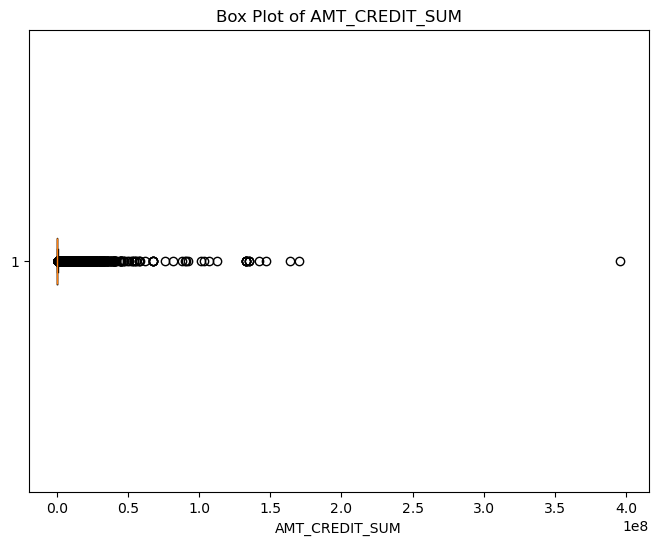

In [50]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(bureau_merged['AMT_CREDIT_SUM'], vert=False, widths = 0.1)  # Horizontal box plot
plt.title('Box Plot of AMT_CREDIT_SUM')
plt.xlabel('AMT_CREDIT_SUM')
plt.show()


# Data Preprocessing


<h3> Removing Outliers </h3>

In [51]:
application_train[['DAYS_EMPLOYED','AMT_INCOME_TOTAL']].describe(include='all')

,DAYS_EMPLOYED,AMT_INCOME_TOTAL
count,307511.000000,3.075110e+05
mean,63815.045904,1.687979e+05
std,141275.766519,2.371231e+05
min,-17912.000000,2.565000e+04
25%,-2760.000000,1.125000e+05
50%,-1213.000000,1.471500e+05
75%,-289.000000,2.025000e+05
max,365243.000000,1.170000e+08


In [53]:
#Remove outliers
def get_thresh(df,field):
    """ Outliers are usually > 3 standard deviations away from the mean. """
    ave=np.mean(df[field])
    sdev=np.std(df[field])
    threshold=round(ave+(3*sdev),2)
    print('Threshold for',field,':',threshold)
    return threshold

In [54]:
thresh_income = get_thresh(application_train,'AMT_INCOME_TOTAL')
anomaly_emp = int(application_train['DAYS_EMPLOYED'][application_train['DAYS_EMPLOYED'] > 0].unique())
temp_orig=application_train[['AMT_INCOME_TOTAL','DAYS_EMPLOYED']]
temp_no_outliers=application_train[['AMT_INCOME_TOTAL','DAYS_EMPLOYED']][(application_train.AMT_INCOME_TOTAL<thresh_income)&(application_train['DAYS_EMPLOYED']<=0)]
print('Anomalous data for DAYS_EMPLOYED :',anomaly_emp)

Threshold for AMT_INCOME_TOTAL : 880166.2
Anomalous data for DAYS_EMPLOYED : 365243


In [57]:
# Retaining only those rows where AMT_INCOME_TOTAL is less than the calculated threshold and DAYS_EMPLOYED is less than 0
application_train = application_train[['AMT_INCOME_TOTAL','DAYS_EMPLOYED']]
[(application_train.AMT_INCOME_TOTAL<thresh_income)&(application_train['DAYS_EMPLOYED']<=0)]

[0          True
 1          True
 2          True
 3          True
 4          True
           ...  
 307506     True
 307507    False
 307508     True
 307509     True
 307510     True
 Length: 307511, dtype: bool]

In [59]:
# NUMBER OF INDIVIDUALS HAVING THE DAYS EMPLOYED ANOMALOUS DATA
len(application_train[application_train.DAYS_EMPLOYED==anomaly_emp])

55374

Detected the outlier by checking the statistics. Convert anomalous data 365243 days to -29200 days (equal to 80 years). I think it's safe to say that an individual is retired by then after working for 80 yrs.

In [60]:
def conv_daysemp(df,ls_cols):
    df[ls_cols[0]].replace(to_replace=365243,value=-29200,inplace=True)
    return df

In [62]:
conv_daysemp(application_train,['DAYS_EMPLOYED'])


,AMT_INCOME_TOTAL,DAYS_EMPLOYED
0,202500.0,-637
1,270000.0,-1188
2,67500.0,-225
3,135000.0,-3039
4,121500.0,-3038
...,...,...
307506,157500.0,-236
307507,72000.0,-29200
307508,153000.0,-7921
307509,171000.0,-4786


In [63]:
#After outliers are removed
application_train[['DAYS_EMPLOYED','AMT_INCOME_TOTAL']].describe(include='all')

,DAYS_EMPLOYED,AMT_INCOME_TOTAL
count,307511.000000,3.075110e+05
mean,-7212.939053,1.687979e+05
std,10519.225541,2.371231e+05
min,-29200.000000,2.565000e+04
25%,-5707.000000,1.125000e+05
50%,-2219.000000,1.471500e+05
75%,-933.000000,2.025000e+05
max,0.000000,1.170000e+08


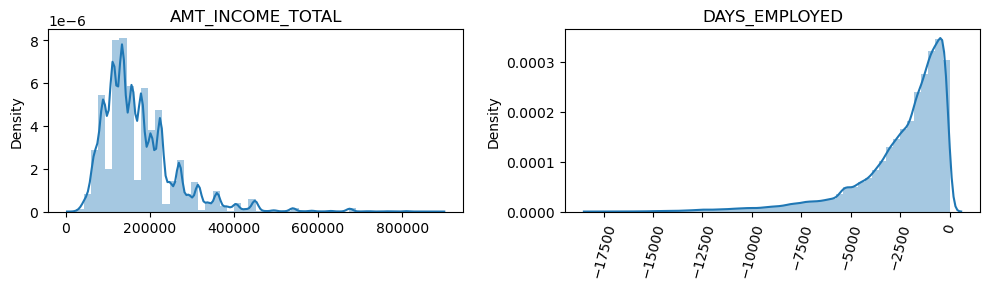

In [64]:
def plotdist(df,f1,f2):
    f,axes = plt.subplots(1,2,figsize=(10,3))
    sns.distplot(df[[f1]],ax=axes[0]).set_title(f1)
    plt.xticks(rotation=75)

    sns.distplot(df[[f2]],ax=axes[1]).set_title(f2)
    plt.xticks(rotation=75)
    plt.tight_layout()
plotdist(temp_no_outliers,'AMT_INCOME_TOTAL','DAYS_EMPLOYED')

In [65]:
# ANOMALY DATA COUNT AFTER CONVERSION
print('Train set :',len(application_train[application_train.DAYS_EMPLOYED==365243]))


Train set : 0


<h3> Dealing with Missing Values </h3>


In [73]:
# Checking for missing values in 3 columns which are external sources
print(application_train['EXT_SOURCE_1'].isnull().sum())
print(application_train['EXT_SOURCE_2'].isnull().sum())
print(application_train['EXT_SOURCE_3'].isnull().sum())

173378
660
60965


In [74]:
def fill_with_mean(df, cols):
    for col in list_col_fill_ext:
        df[col] = df[col].astype(float)
    for col in cols:
        df[col] = df[col].fillna(df[col].mean())
    return df

list_col_fill_ext = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
# Fill in the training set
application_train = fill_with_mean(application_train, list_col_fill_ext)


In [76]:
#After imputing Missing Values
print(application_train[list_col_fill_ext].isnull().sum().sort_values(ascending=False).head(20))


EXT_SOURCE_1    0
EXT_SOURCE_2    0
EXT_SOURCE_3    0
dtype: int64


In [77]:
# Missing Value 2

In [78]:
application_train['OCCUPATION_TYPE'].isnull().sum()

96391

In [81]:
#Filling with a new category
application_train['OCCUPATION_TYPE'].fillna('Data Not Available', inplace=True)

In [80]:
application_train['OCCUPATION_TYPE'].isnull().sum()

0

# Data Transformation

<h3> Label Encoding of Categorical Variables </h3>

In [82]:
# BEFORE CONVERSION
print(application_train[['CODE_GENDER','NAME_EDUCATION_TYPE','ORGANIZATION_TYPE']].head(3))


  CODE_GENDER            NAME_EDUCATION_TYPE       ORGANIZATION_TYPE
0           M  Secondary / secondary special  Business Entity Type 3
1           F               Higher education                  School
2           M  Secondary / secondary special              Government


In [83]:
def conv_gender(df,ls_cols):
    df[ls_cols[0]] = df[ls_cols[0]].map({'XNA':0,'M':1,'F':2}).astype(int)
    return df

def conv_education(df,ls_cols):
    temp_dict = {
        'Lower secondary':1,
        'Secondary / secondary special':2,
        'Incomplete higher':3,
        'Higher education':4,
        'Academic degree':5
    }
    df[ls_cols[0]] = df[ls_cols[0]].map(temp_dict).astype(int)
    return df

def conv_org(df,ls_cols):
    ls_ctr=[i for i in np.arange(1,len(ls_cols)+1)]
    temp_dict = dict(zip(ls_cols,ls_ctr))
    df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].map(temp_dict).astype(int)
    return df

In [84]:
# CONVERT COLUMN : 
list_col_conv_gender = ['CODE_GENDER']

# CONVERT COLUMN :
list_col_conv_edu = ['NAME_EDUCATION_TYPE']

# CREATE NEW COLUMN : AGE
list_col_new_age = ['DAYS_BIRTH']
conv_gender(application_train,list_col_conv_gender)
conv_education(application_train,list_col_conv_edu)
orgtype = sorted(application_train.ORGANIZATION_TYPE.unique())
conv_org(application_train,orgtype)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,1,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,2,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,1,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,2,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,1,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,1,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,2,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,2,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,2,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# AFTER CONVERSION
print(application_train[['CODE_GENDER','NAME_EDUCATION_TYPE','ORGANIZATION_TYPE']].head(3))


   CODE_GENDER  NAME_EDUCATION_TYPE  ORGANIZATION_TYPE
0            1                    2                  6
1            2                    4                 40
2            1                    2                 12


<h3> Normalization </h3>

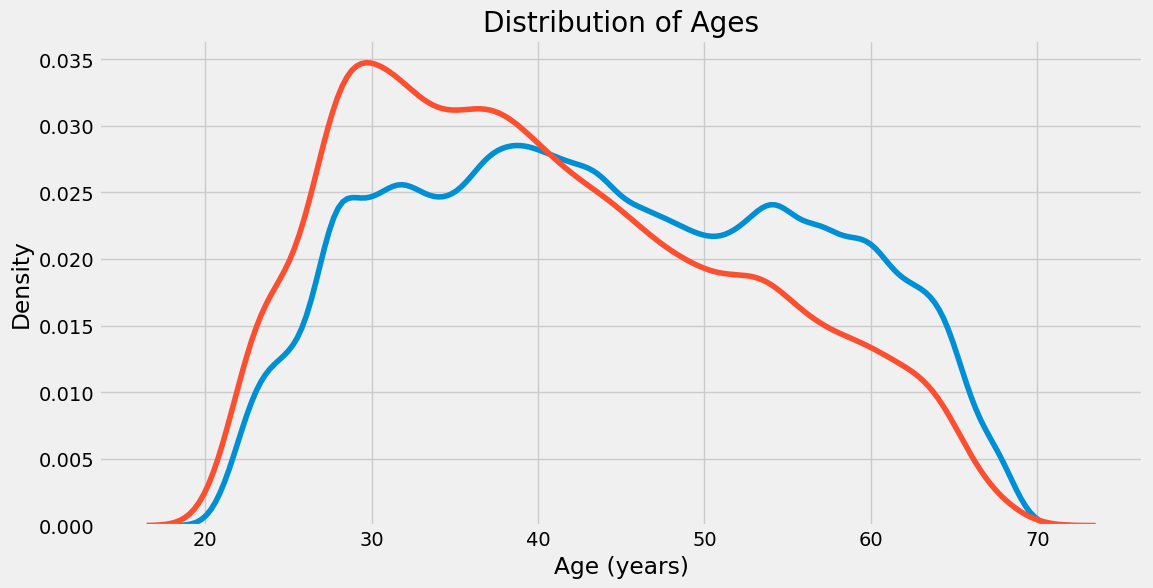

In [88]:
plt.figure(figsize = (12, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [90]:
application_train['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
application_train['DAYS_BIRTH_NORMALIZED'] = scaler.fit_transform(application_train[['DAYS_BIRTH']])


In [93]:
application_train['DAYS_BIRTH_NORMALIZED'].describe()

count    307511.000000
mean          0.481849
std           0.245997
min           0.000000
25%           0.277565
50%           0.465671
75%           0.687317
max           1.000000
Name: DAYS_BIRTH_NORMALIZED, dtype: float64

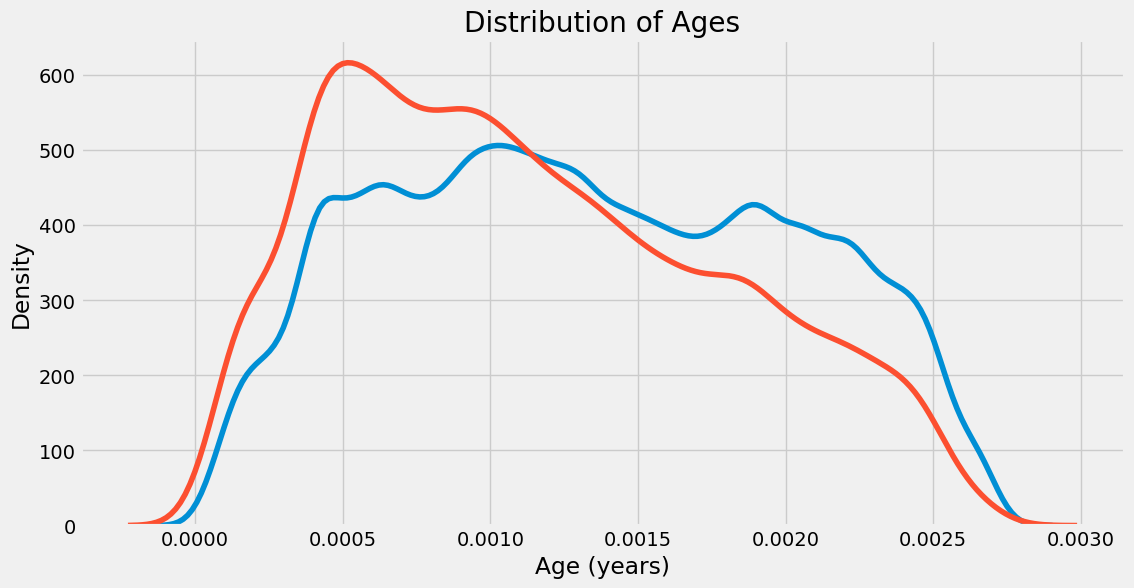

In [95]:
plt.figure(figsize = (12, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH_NORMALIZED'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH_NORMALIZED'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');